## **FETAL HEALTH DATASET**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.
Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.
In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

In this notebook we are going to create  classification model using machine learning techniques that
will classify fetal health based on 3 classes which are:


1.  Normal
2.  Suspect
3.  Pathological

The models used are Random Forest, Logistic Regression, and KNN, and the chosen evaluation metric is the F-score. The obtained results show an ability to classify fetal health with an accuracy of 0.94.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import f1_score

#**`1 EDA`**

In [3]:
SEED=90
df=pd.read_csv('./fetal_health.csv')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

The columns are described from the data source as follows:

- baseline value - Baseline Fetal Heart Rate (FHR) (beats
per minute) <br>
- accelerations - Number of accelerations per second<br>
- fetal_movement - Number of fetal movements per second<br>
- uterine_contractions - Number of uterine contractions per second<br>
- light_decelerations - Number of light decelerations per second<br>
- severe_decelerations - Number of severe decelerations per second<br>
- prolongued_decelerations - Number of prolonged decelerations per second<br>
- abnormal_short_term_variability - Percentage of time with abnormal short-term variability<br>
- mean_value_of_short_term_variability - Mean value of short-term variability<br>
- percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability<br>
- mean_value_of_long_term_variability - Mean value of long-term variability<br>
- histogram_width - Width of FHR histogram (generated from exam)<br>
- histogram_min - Minimum of FHR histogram (generated from exam)<br>
- histogram_max - Maximum of FHR histogram (generated from exam)<br>
- histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)<br>
- histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)<br>
- histogram_mode - Mode of FHR histogram (generated from exam)<br>
- histogram_mean - Mean of FHR histogram (generated from exam)<br>
- histogram_median - Median of FHR histogram (generated from exam)<br>
- histogram_variance - Variance of FHR histogram (generated from exam)<br>
- histogram_tendency - Tendency of FHR histogram (generated from exam)<br>
- fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological<br>

The dataset is well-structured with no missing values, and all of the features are numerical. At first glance, it is not possible to determine if there are any superfluous features that need to be eliminated. However, as we can see below, there is an imbalanced class distribution. Approximately 78% of the cases correspond to normal fetal health, 14% to suspect fetal health, and 8% to pathological fetal health. Therefore, it is important to keep an eye on this imbalance in the subsequent steps of the analysis.

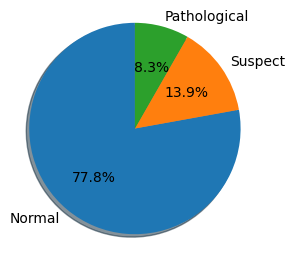

In [ ]:
df['fetal_health'].value_counts(normalize=True)
fig1, ax1 = plt.subplots(figsize=(3,3))
labels=['Normal','Suspect','Pathological']
ax1.pie(df.fetal_health.value_counts(), labels=labels,
        autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

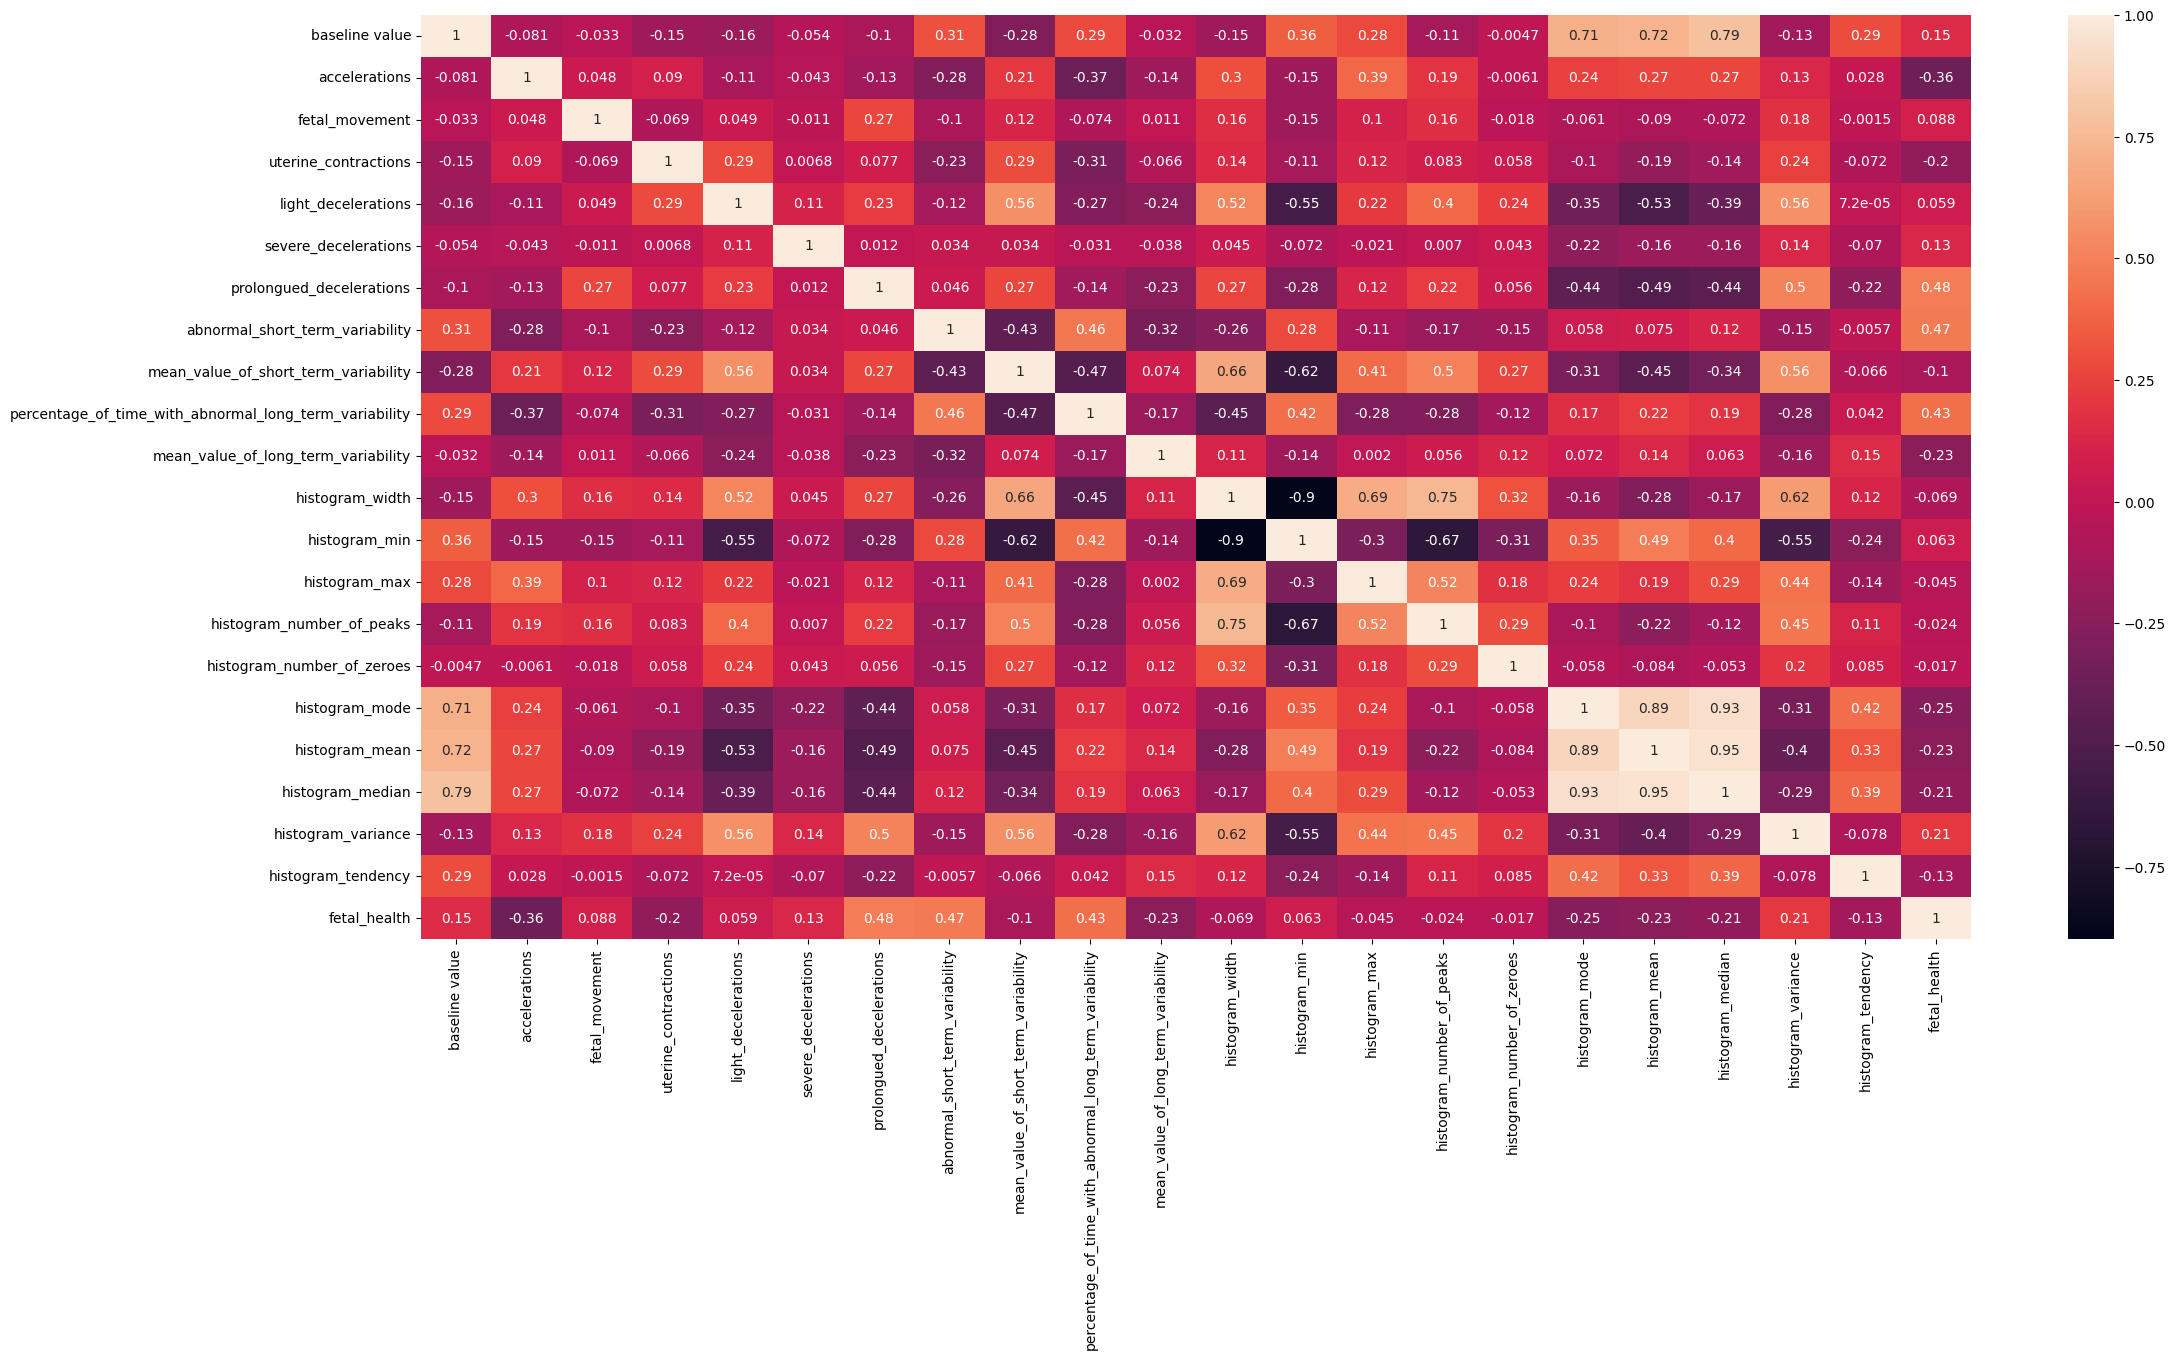

In [ ]:
#Plot of the correlation matrix to see correlation between features and feature-target.
fig, ax = plt.subplots(figsize=(25, 12))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

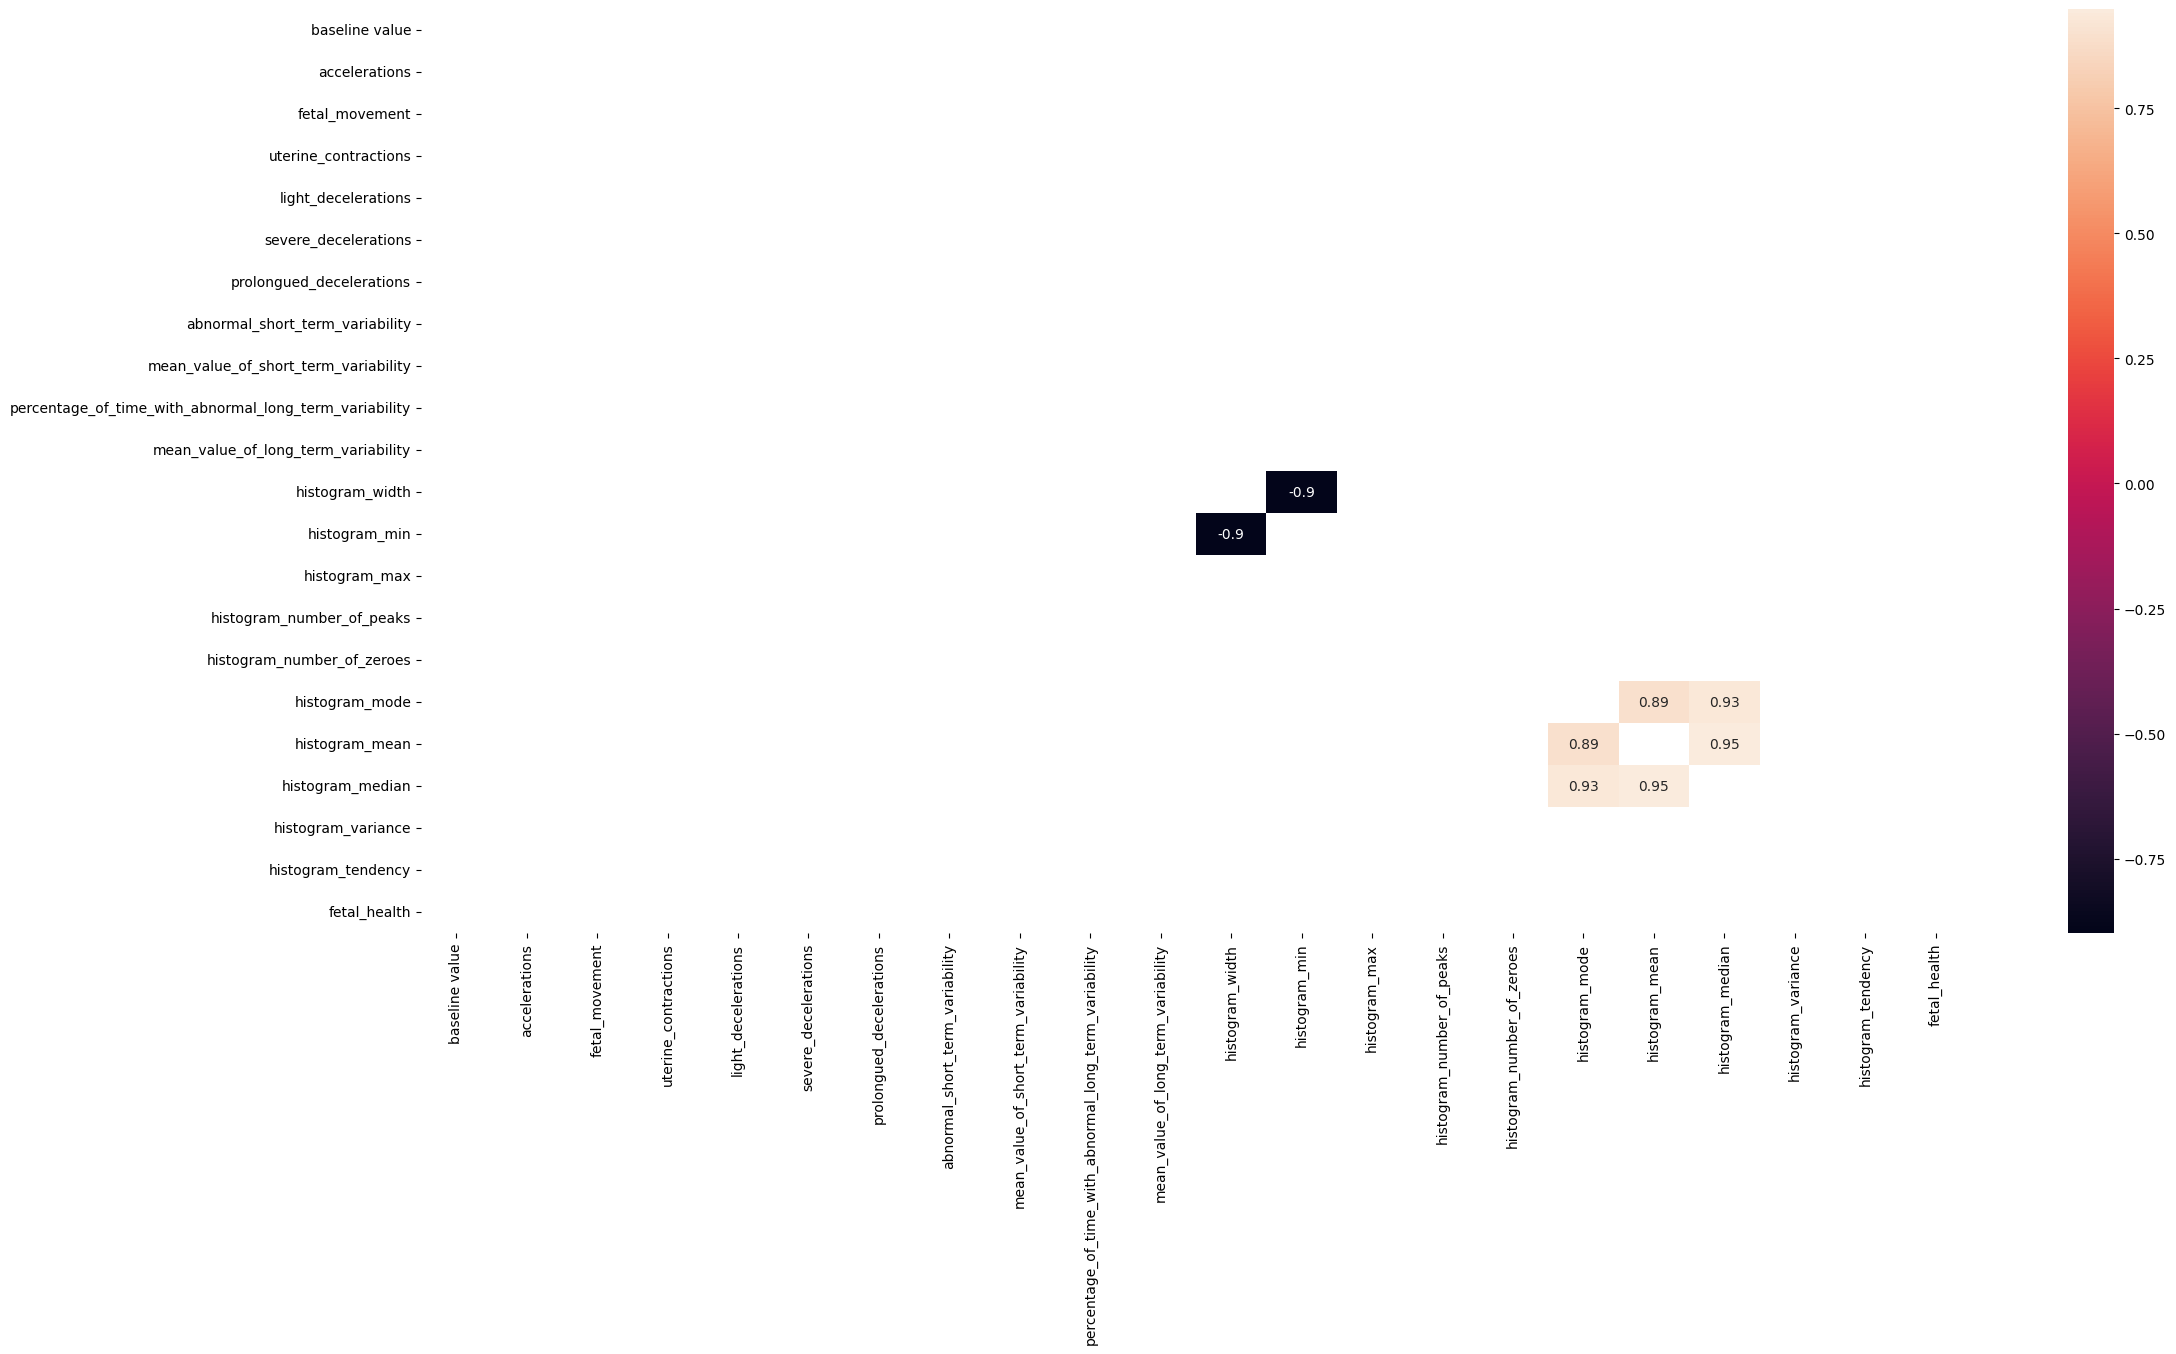

In [ ]:
#Investigate where  is a strong correlation
soglia=0.8
corr2=corr[((corr>soglia) | (corr<-soglia)) & (corr!=1)]
fig, ax = plt.subplots(figsize=(25, 12))

sns.heatmap(corr2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

None of the features have a strong correlation with the target variable. However, the 'prolonged_decelerations' and 'abnormal_short_term_variability' show a correlation value of 0.5. On the other hand, there are some features that exhibit a strong correlation (>0.9) with each other.

It is generally recommended to remove features that are highly correlated with each other in order to stabilize the model. By doing so, we can avoid redundant information and potential multicollinearity issues."

In [ ]:
cols=['histogram_width','histogram_mode','histogram_median']
df.drop(cols,axis=1,inplace=True)

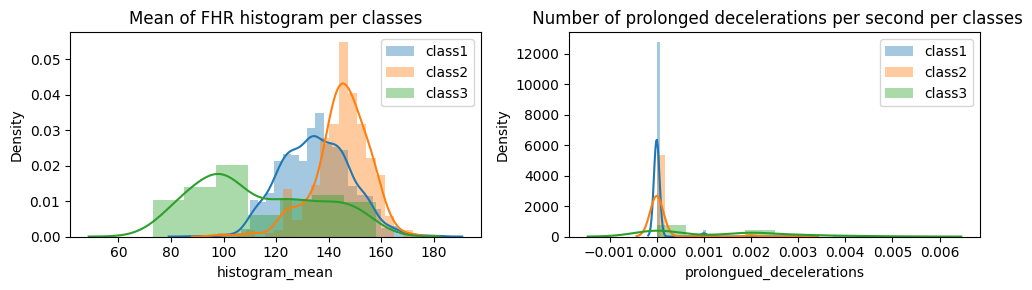

In [ ]:
#Visualization of distribution of features per classes
fig,axis=plt.subplots(1,2,figsize=(10,3))
sns.distplot(df[df['fetal_health']==1]['histogram_mean'],
             kde=True,label='class1',ax=axis[0])
sns.distplot(df[df['fetal_health']==2]['histogram_mean'],
             kde=True,label='class2',ax=axis[0])
sns.distplot(df[df['fetal_health']==3]['histogram_mean'],
             kde=True,label='class3',ax=axis[0])
axis[0].set_title('Mean of FHR histogram per classes')
axis[0].legend()

sns.distplot(df[df['fetal_health']==1]['prolongued_decelerations'],
             kde=True,label='class1',ax=axis[1])
sns.distplot(df[df['fetal_health']==2]['prolongued_decelerations'],
             kde=True,label='class2',ax=axis[1])
sns.distplot(df[df['fetal_health']==3]['prolongued_decelerations'],
             kde=True,label='class3',ax=axis[1])
axis[1].set_title(' Number of prolonged decelerations per second per classes')
axis[1].legend()
fig.tight_layout()

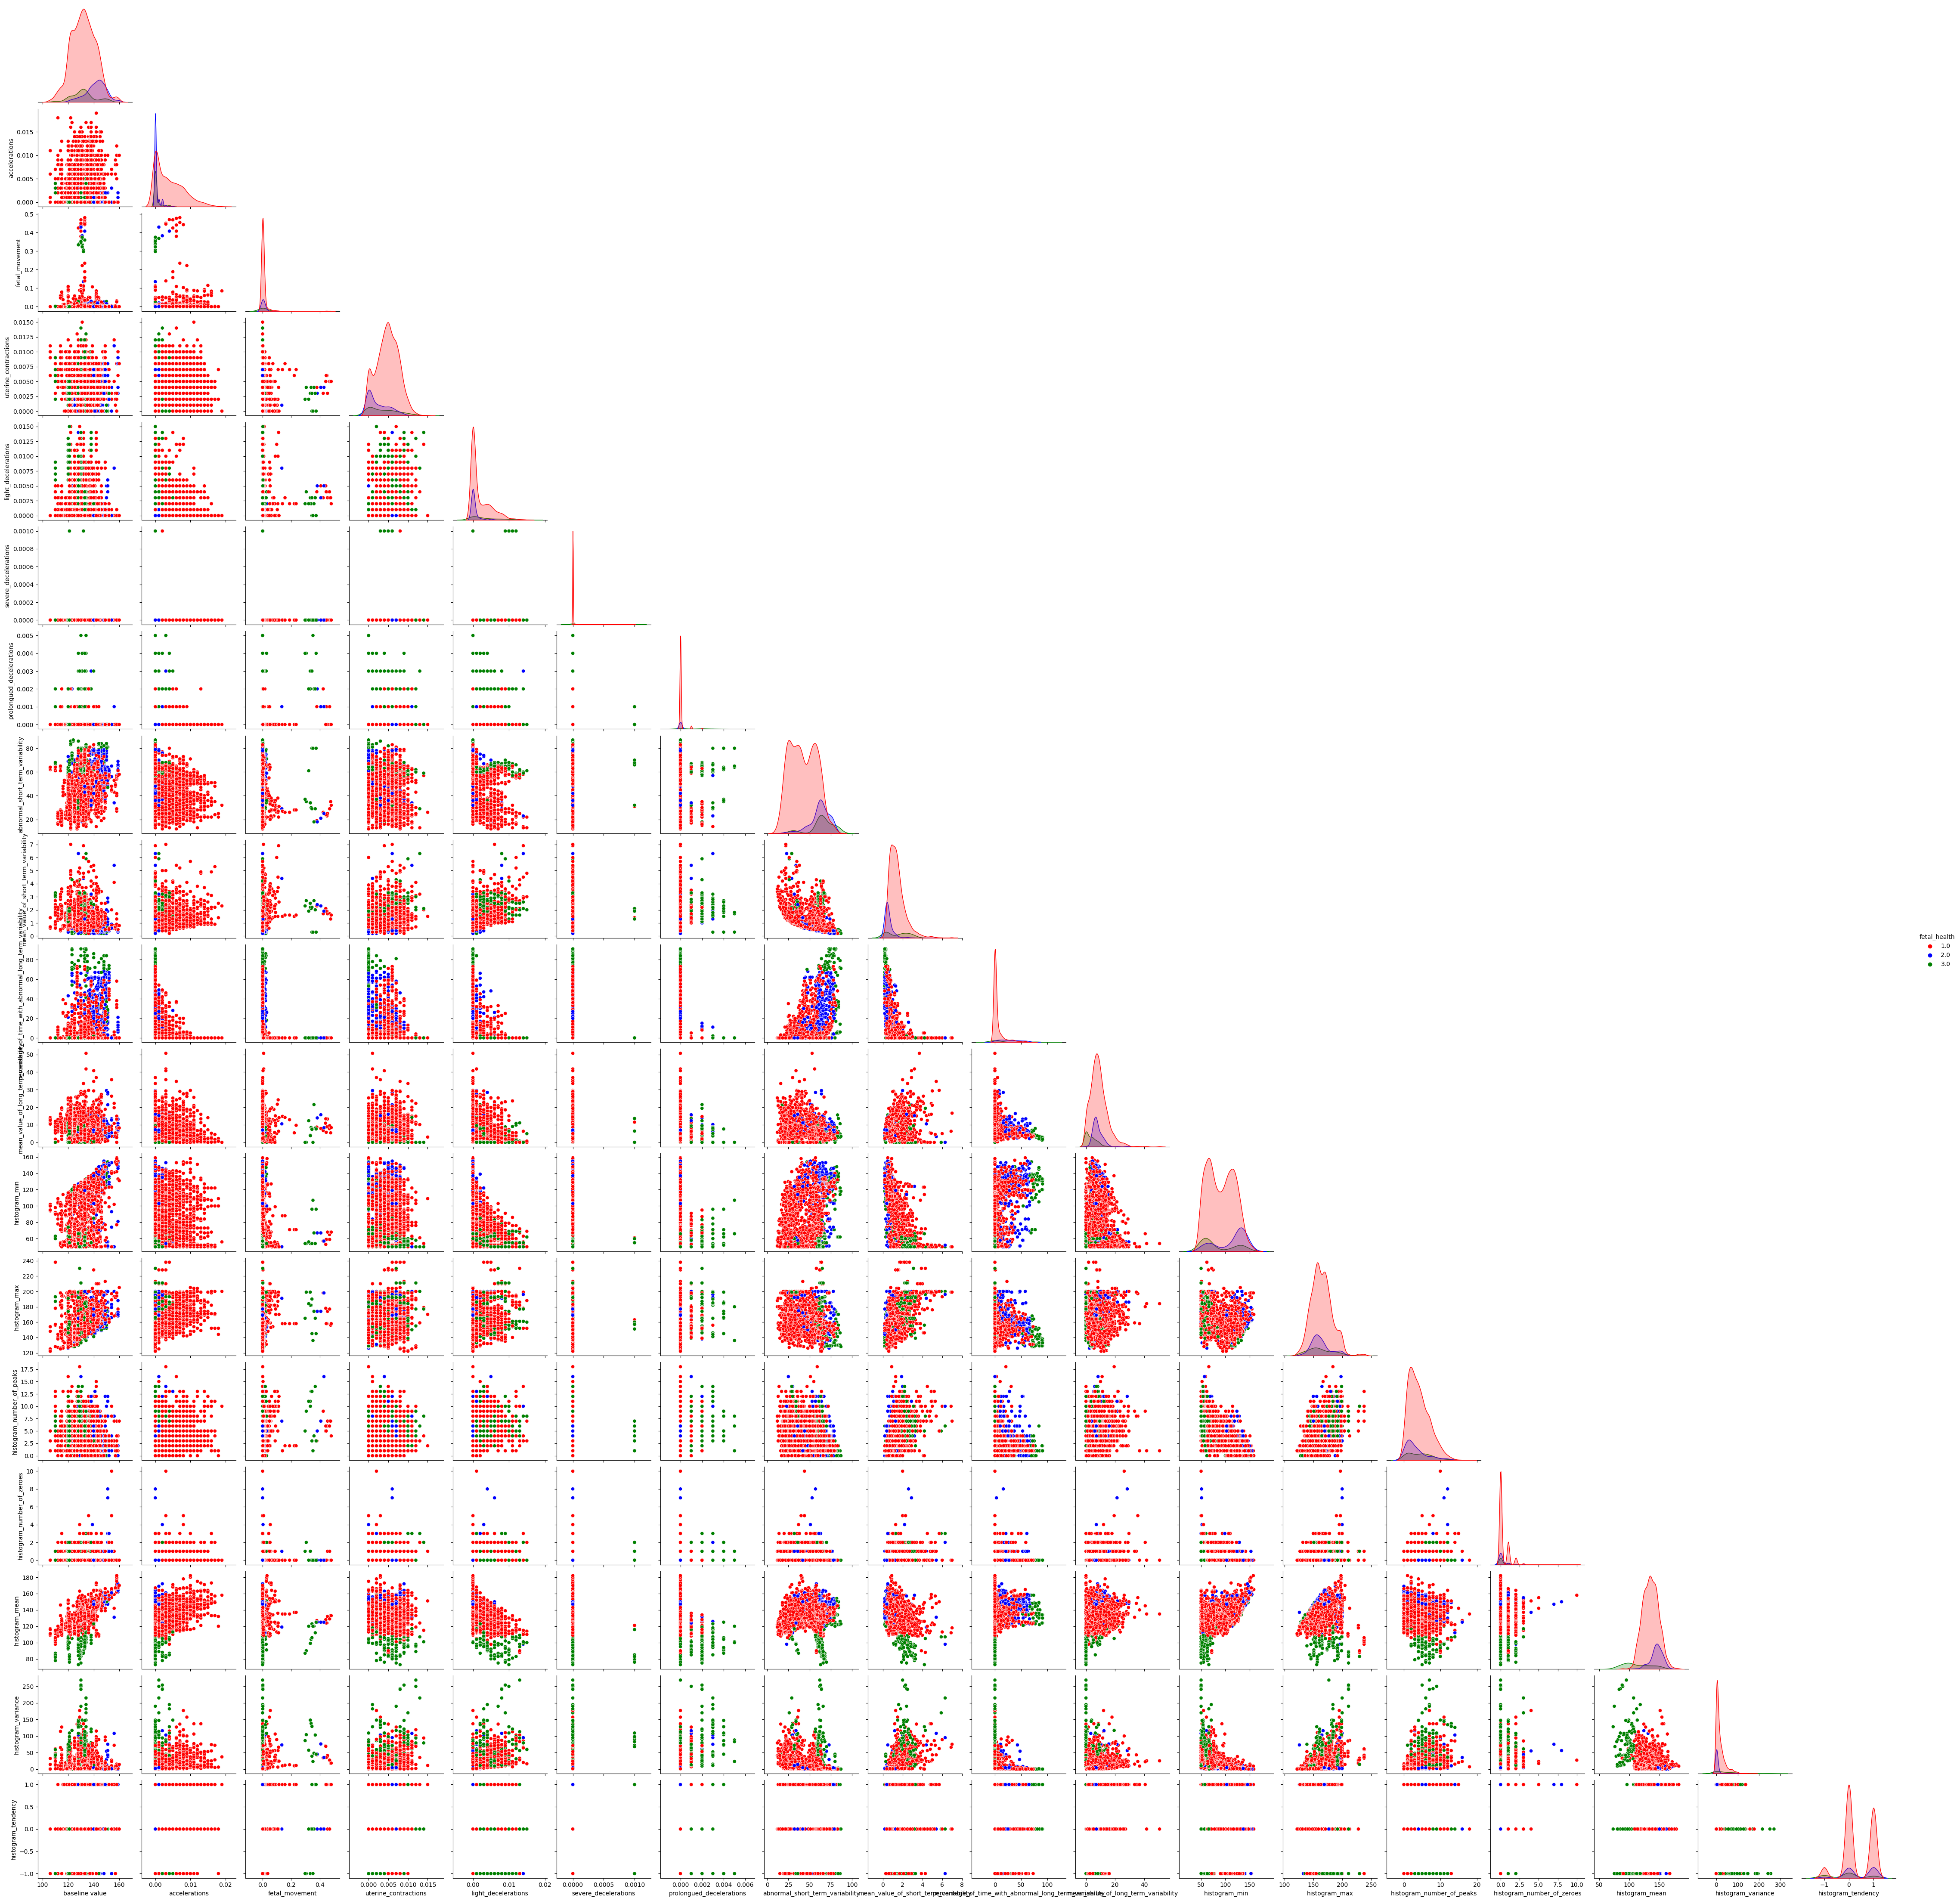

In [ ]:
#Pairplot
cols=df.columns
sns.pairplot(df[cols],hue='fetal_health',corner=True,palette=['red','blue','green'])

What I observe from the pairplot and distplot is that the values found in class 2 and 3 are also present in class 1. However, in most cases, class 1 covers a wider range of values, possibly due to having more data. Therefore, there is no clear distinction between the classes when we consider the standard average ± deviation range, except for a few features like 'histogram_mean'.


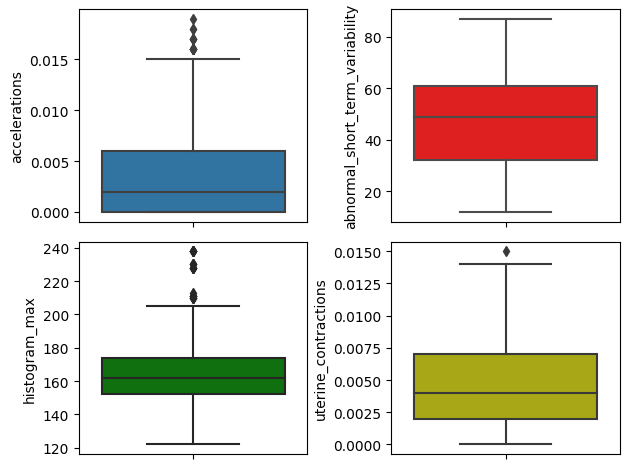

In [ ]:
#Boxplot to investigate if there are outliers in a subsample of features
fig,ax=plt.subplots(2,2)
sns.boxplot(data=df,y='accelerations',ax=ax[0,0])
sns.boxplot(data=df,y='abnormal_short_term_variability',color='r',ax=ax[0,1])
sns.boxplot(data=df,y='histogram_max',color='g',ax=ax[1,0])
sns.boxplot(data=df,y='uterine_contractions',color='y',ax=ax[1,1])
fig.tight_layout()

In [ ]:
target=df['fetal_health']
df.drop('fetal_health',axis=1,inplace=True)
#Train-test split
X_train,X_test,y_train,y_test=train_test_split(df,target,stratify=target,
                                               random_state=SEED)
#I set stratify=target to ensure that the train and test sets maintain the same percentage of classes.
#This is important because the classes are imbalanced, and without stratification,
#there is a risk of not adequately testing the model on a sufficient number of examples from the smaller classes
print('Train:',X_train.shape, y_train.shape)
print('Test:',X_test.shape, y_test.shape)

Train: (1594, 18) (1594,)
Test: (532, 18) (532,)


#### **1.1 OUTLIERS DETECTION** </font> <br>
Based on the distribution of variables, I have observed the presence of numerous outliers. In a classification or regression dataset, the presence of outliers can negatively impact the model's fit and lower its predictive performance.

To address this issue, one approach is to use the Isolation Forest algorithm. This algorithm models the normal data to effectively isolate anomalies that are both scarce and distinct in the feature space. One of the most important hyperparameters in this algorithm is the 'contamination' argument, which helps estimate the number of outliers in the dataset. The 'contamination' value ranges between 0.0 and 0.5, with a default setting of 0.1

In [ ]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask=yhat!=-1
#create a new training dataset without outliers
X_train_new,y_train_new = X_train.iloc[mask,:],y_train.iloc[mask] #new X_train and y_train where we can fit the model withoout outliers

print('Shape of the new training set:',X_train_new.shape, y_train_new.shape)
print('The percentage of outliers in the training set was {:.2f} %'
     .format((X_train.shape[0]-X_train_new.shape[0])/X_train.shape[0]))

Shape of the new training set: (1434, 18) (1434,)
The percentage of outliers in the training set was 0.10 %


<font color='green'> **Scaling of the dataset** </font> <br>
To ensure optimal performance, many machine learning models require feature scaling. In this case, I will use the MinMaxScaler function from the sklearn library.

In [ ]:
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train_new)
X_test_scaled=scaler.transform(X_test)

####  **1.2 FEATURE SELECTION** </font> <br>
Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable. When the target variable is categorical (e.g., in classification predictive modeling), two commonly used feature selection methods for numerical input data are the ANOVA f-test statistic and the mutual information statistic.

In [ ]:
#ANOVA
def select_features1(X_train_scaled, y_train_new, X_test_scaled):
    fs = SelectKBest(score_func=f_classif, k=3) # k is the number of top features to select
    fs.fit(X_train_scaled, y_train_new)
    X_train_fs = fs.transform(X_train_scaled)
    X_test_fs = fs.transform(X_test_scaled)
    return X_train_fs, X_test_fs, fs


#MUTUAL INFORMATION
def select_features2(X_train_scaled, y_train_new, X_test_scaled):
    fs = SelectKBest(score_func=mutual_info_classif, k=3)  # k is the number of top features to select
    fs.fit(X_train_scaled, y_train_new)
    X_train_fs = fs.transform(X_train_scaled)
    X_test_fs = fs.transform(X_test_scaled)
    return X_train_fs, X_test_fs, fs

Text(0.5, 1.0, 'Anova Test')

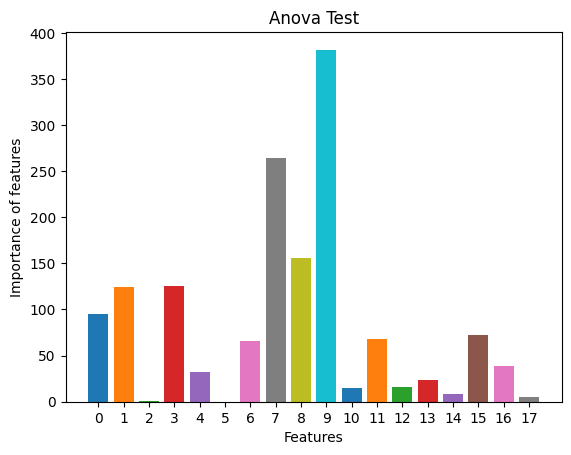

In [ ]:
#ANOVA
X_train_fs1,X_test_fs1,fs1=select_features1(X_train_scaled,y_train_new,X_test_scaled)
for i in range(len(fs1.scores_)):
    plt.bar(i,height=fs1.scores_[i])
    plt.xticks(np.arange(18))

plt.xlabel('Features')
plt.ylabel('Importance of features')
plt.title('Anova Test')

Text(0.5, 1.0, 'Mutual Information Test')

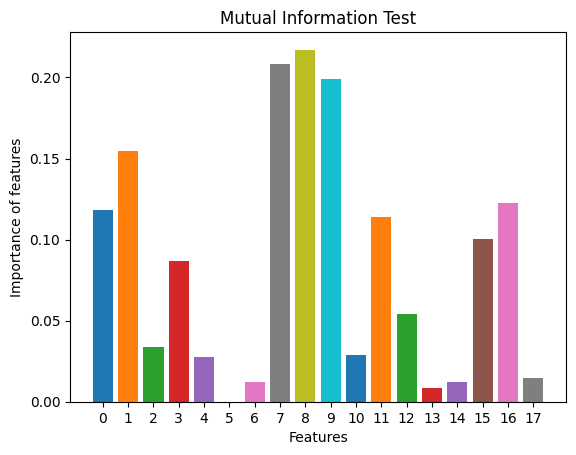

In [ ]:
#MUTUAL INFORMATION
X_train_fs2,X_test_fs2,fs2=select_features2(X_train_scaled,y_train_new,X_test_scaled)
for i in range(len(fs2.scores_)):
    plt.bar(i,height=fs2.scores_[i])
    plt.xticks(np.arange(18))

plt.xlabel('Features')
plt.ylabel('Importance of features')
plt.title('Mutual Information Test')

Both methods assign different levels of importance to the features, but interestingly, both methods select features 7 ('prolongued_decelerations'), 8 ('abnormal_short_term_variability'), and 9 ('mean_value_of_short_term_variability') as important.

## **2 PREDICTION OF THE STATE OF HEALTH** </font> <br>
To predict the health state, I have the option to choose from a variety of machine learning algorithms. To determine which algorithm works best for my problem, I am conducting a spot-checking analysis. Spot-checking involves evaluating the performance of different algorithms on your specific machine learning problem.

For this spot-checking analysis, I have selected the following models: Logistic Regression, RandomForest Classifier, and K-nearest neighbors.

I will explore two different approaches:

- Using all the available features: **WAY1**.<br>
-  Selecting three features that have shown to be more relevant based on Mutual Information and the Anova test: **WAY2**.<br>

To evaluate the performance of these models for the classification problem, I have chosen the F-score as the evaluation metric. <br>

 $ F =  (2 * Precision * Recall)  /  (Precision + Recall)$. <br>

Where:<br>
 $ Precision = TruePositive / (TruePositive + FalsePositive)$ and $Recall = TruePositive / (TruePositive + FalseNegative)$. <br>

The F-score is a widely used metric for imbalanced classification problems, as it provides a way to combine both precision and recall into a single measure that captures both properties.

In [ ]:
#Define a function that create a dictionary of models.
# As regards the fundamental hyperparameters of the models,
# I insert a reduced list of them to evaluate the various models in a not too thorough way.

def define_models(models=dict()):
    C1=[0.01,0.1,1,10,100]
    for c in C1:
        models['LogisticRegression'+str(c)]= LogisticRegression(C=c,random_state=SEED)
    K1=np.arange(1,10)
    for k in K1:
        models['KNN'+str(k)]= KNeighborsClassifier (n_neighbors=k)
    n_estimators=[50,100,300]
    for i in n_estimators:
        models['RandomForest'+str(i)]=RandomForestClassifier(n_estimators=i,max_features=None,random_state=SEED)
    return models

In [ ]:
#Define a function that evaluate the models
kfold=model_selection.KFold(n_splits=5) #number of splits

def train_evaluate_model(model, folds,X_train, y_train, X_test,y_test):

    model.fit(X_train, y_train)  #fit the model instance
    predictions = model.predict(X_test) # calculate predictions
    #compute metrics for evaluation
    resultss=model_selection.cross_val_score(model,X_train,y_train,
                                             cv=kfold,scoring='f1_weighted')

    print('{}:{}'.format(model,round(resultss.mean(),2)))

    return resultss.mean()

#### **2.1 WAY 1** </font>

In [ ]:
func=define_models()
diz_models=dict()
for name,model in func.items():
    result=train_evaluate_model(model,kfold, X_train_scaled, y_train_new, X_test_scaled,y_test)
    diz_models[name]=result

LogisticRegression(C=0.01, random_state=10):0.72
LogisticRegression(C=0.1, random_state=10):0.82
LogisticRegression(C=1, random_state=10):0.89
LogisticRegression(C=10, random_state=10):0.89
LogisticRegression(C=100, random_state=10):0.89
KNeighborsClassifier(n_neighbors=1):0.9
KNeighborsClassifier(n_neighbors=2):0.89
KNeighborsClassifier(n_neighbors=3):0.9
KNeighborsClassifier(n_neighbors=4):0.89
KNeighborsClassifier():0.89
KNeighborsClassifier(n_neighbors=6):0.88
KNeighborsClassifier(n_neighbors=7):0.89
KNeighborsClassifier(n_neighbors=8):0.88
KNeighborsClassifier(n_neighbors=9):0.89
RandomForestClassifier(max_features=None, n_estimators=50, random_state=10):0.93
RandomForestClassifier(max_features=None, random_state=10):0.93
RandomForestClassifier(max_features=None, n_estimators=300, random_state=10):0.93


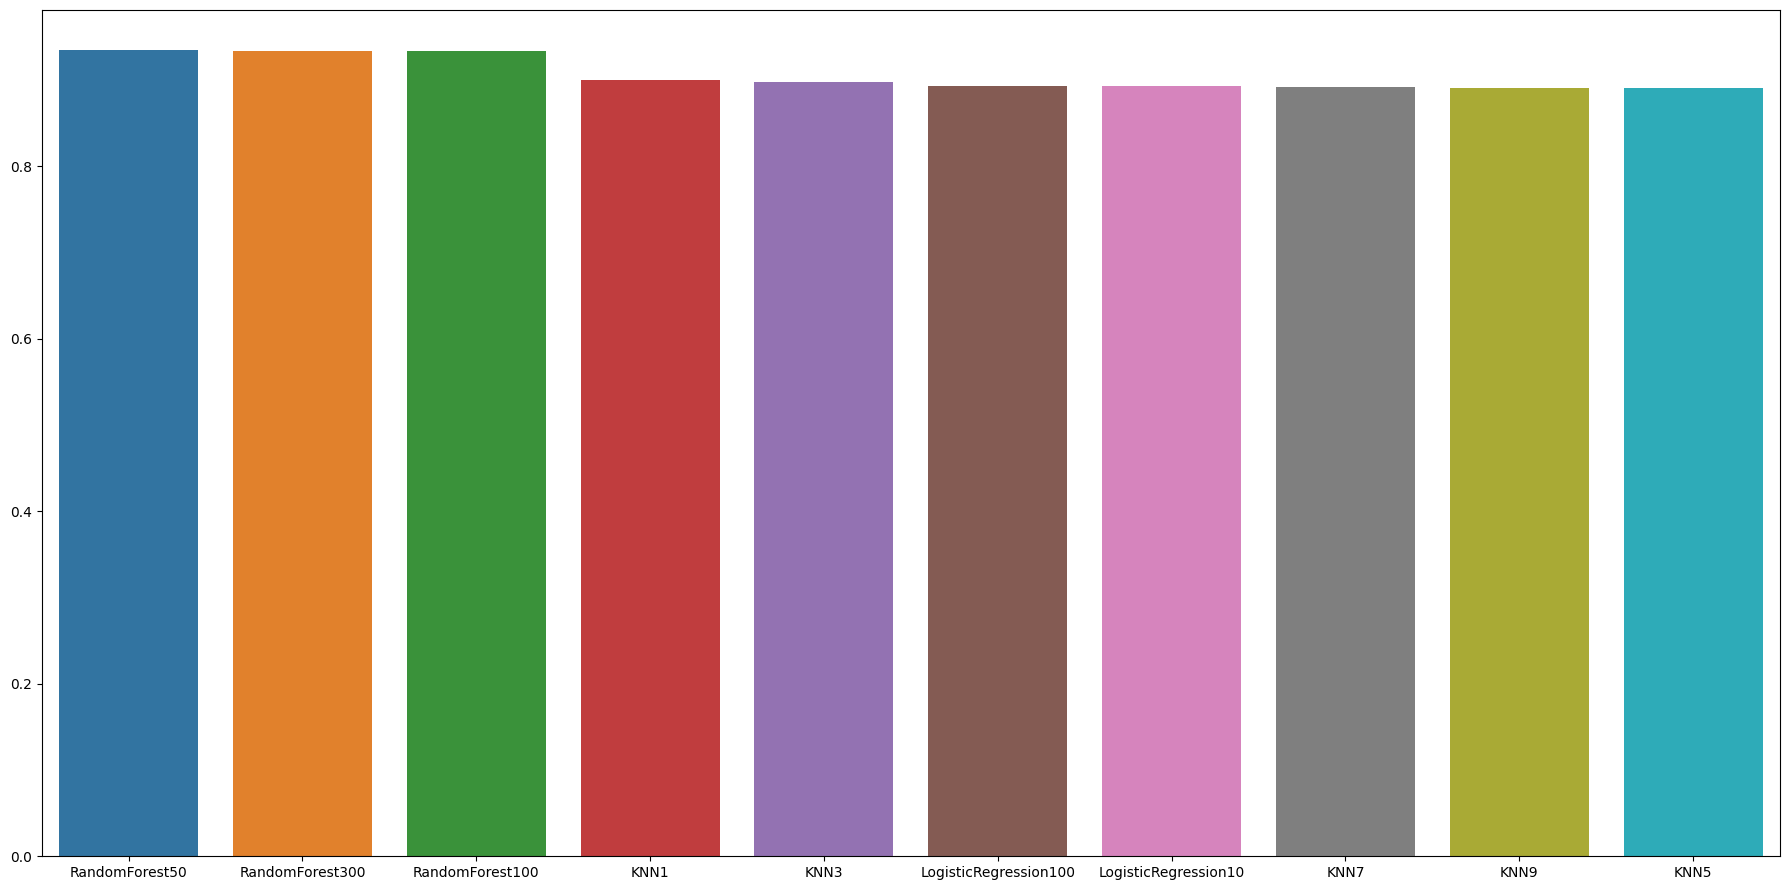

In [ ]:
# sorting the score of models
dict_sorted=dict(sorted(diz_models.items(),
                        key=lambda x:x[1],reverse=True))
scores=[]
names=[]
for k,v in dict_sorted.items():
    scores.append(v)
    names.append(k)
#plot of the first 10 classifier
fig,ax=plt.subplots(figsize=(18,9))
sns.barplot(y=scores[0:10],x=names[0:10])
fig.tight_layout()

RandomForest and KNN are better than Logistic Regression.<br>
Now I do a tuning of the hyperparameters with GridSearch to investigate which one is the best.

In [ ]:
#GridSearch
best_p_RF={'n_estimators':[100,200,300,400,500],
          'max_features':[None,'sqrt'],
          'min_samples_split':[2,4,6,8]}

best_p_KNN={'n_neighbors':np.arange(1,20)}
gridsearch_RF=GridSearchCV(RandomForestClassifier(),best_p_RF,cv=5)
gridsearch_KNN=GridSearchCV(KNeighborsClassifier(),best_p_KNN,cv=5)


In [ ]:
gridsearch_RF.fit(X_train_scaled,y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [None, 'sqrt'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
gridsearch_KNN.fit(X_train_scaled,y_train_new)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print('RF best parameters:',gridsearch_RF.best_params_)
print('KNN best parameters:',gridsearch_KNN.best_params_)

RF best parameters: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
KNN best parameters: {'n_neighbors': 3}


In [ ]:
y_hat1=gridsearch_RF.predict(X_test_scaled)
y_hat2=gridsearch_KNN.predict(X_test_scaled)
#The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores,
#while considering each class's sample.
f_score_RF=f1_score(y_hat1,y_test,average='weighted')
f_score_KNN=f1_score(y_hat2,y_test,average='weighted')
print('f_score_RF_way1:',f_score_RF)
print('f_score_KNN_way1:',f_score_KNN)

f_score_RF_way1: 0.9432101773651382
f_score_KNN_way1: 0.8943879617453873


Random Forest performs better than KNN reaching a value of 0.943.

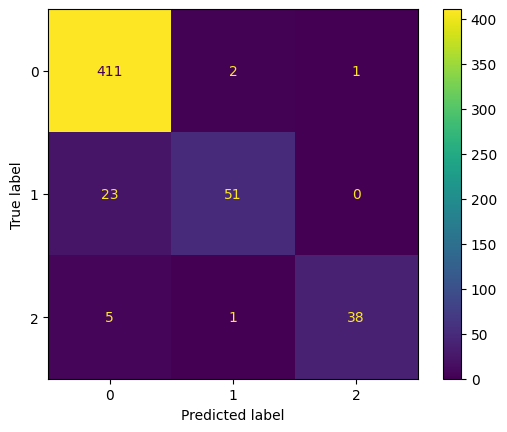

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_hat1)
ConfusionMatrixDisplay(cm).plot()

#### **2.2 WAY 2** </font>

In [ ]:
func2=define_models()
diz2_models=dict()
for name,model in func2.items():
    result2=train_evaluate_model(model,kfold, X_train_fs1, y_train_new, X_test_fs1,y_test)
    diz2_models[name]=result2

LogisticRegression(C=0.01, random_state=10):0.72
LogisticRegression(C=0.1, random_state=10):0.78
LogisticRegression(C=1, random_state=10):0.82
LogisticRegression(C=10, random_state=10):0.85
LogisticRegression(C=100, random_state=10):0.85
KNeighborsClassifier(n_neighbors=1):0.88
KNeighborsClassifier(n_neighbors=2):0.89
KNeighborsClassifier(n_neighbors=3):0.9
KNeighborsClassifier(n_neighbors=4):0.9
KNeighborsClassifier():0.9
KNeighborsClassifier(n_neighbors=6):0.9
KNeighborsClassifier(n_neighbors=7):0.9
KNeighborsClassifier(n_neighbors=8):0.9
KNeighborsClassifier(n_neighbors=9):0.9
RandomForestClassifier(max_features=None, n_estimators=50, random_state=10):0.91
RandomForestClassifier(max_features=None, random_state=10):0.91
RandomForestClassifier(max_features=None, n_estimators=300, random_state=10):0.91


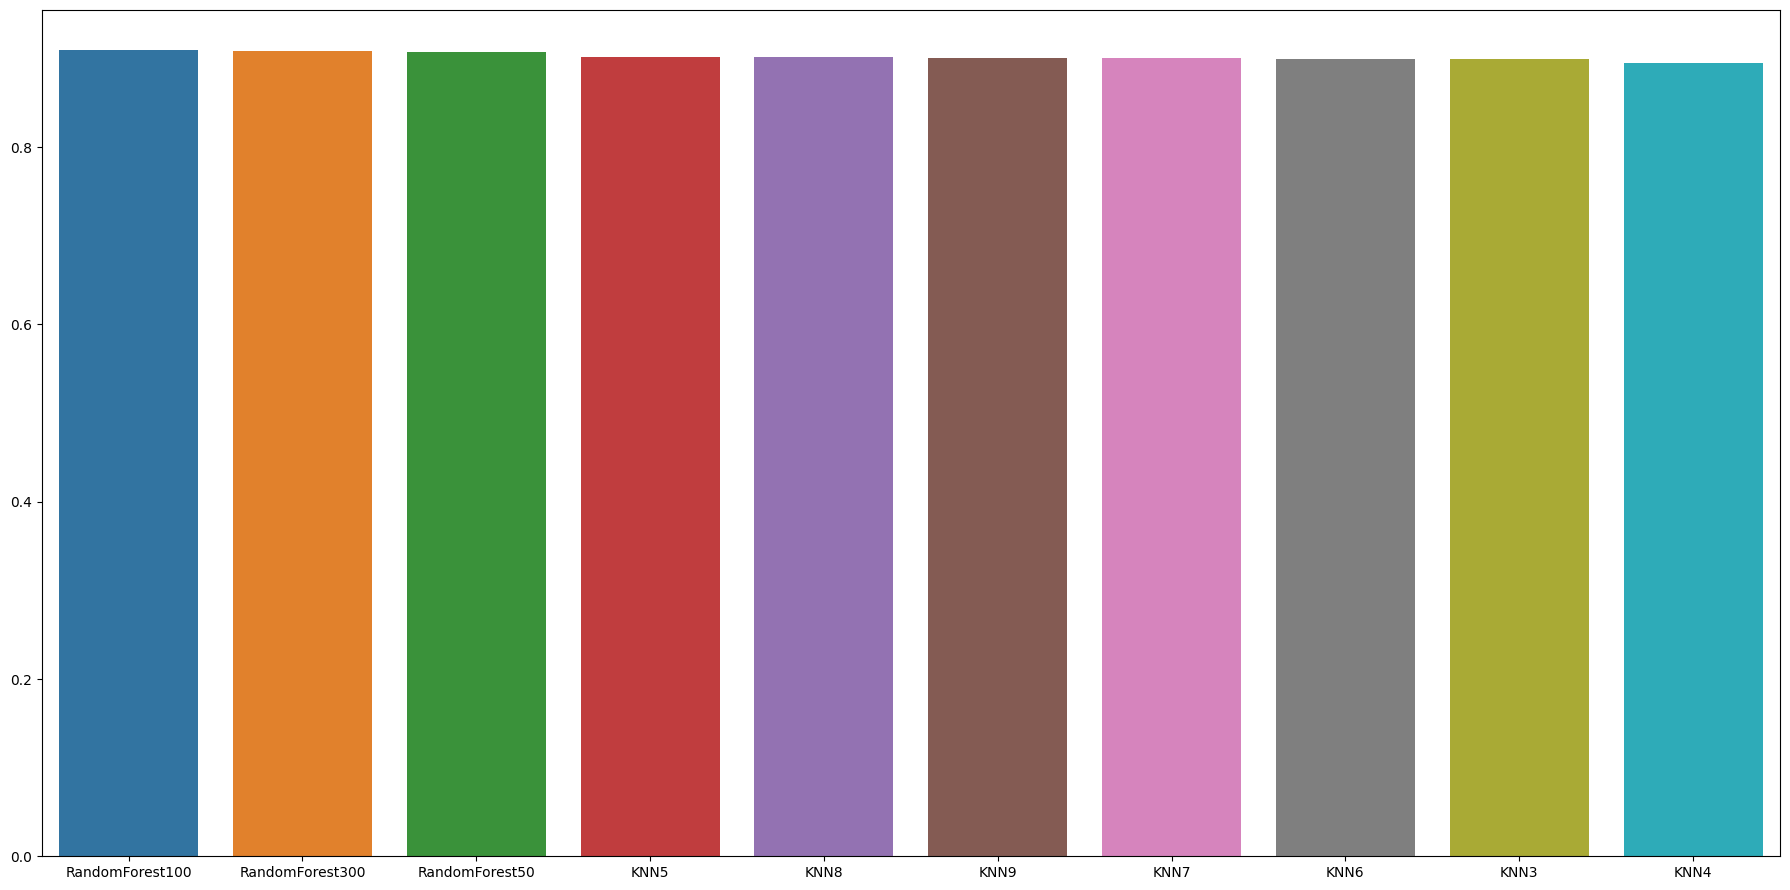

In [ ]:
# sorting the score of models
dict2_sorted=dict(sorted(diz2_models.items(),key=lambda x:x[1],
                         reverse=True))

scores2=[]
names2=[]
for k,v in dict2_sorted.items():
    scores2.append(v)
    names2.append(k)
 #Plot
fig,ax=plt.subplots(figsize=(18,9))
sns.barplot(y=scores2[0:10],x=names2[0:10])
fig.tight_layout()

In [ ]:
# GridSearch using the same grid of the way 1.
# In this case the training dataset is different because we have transformed it using only 3 features
gridsearch_RF.fit(X_train_fs1,y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [None, 'sqrt'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
gridsearch_KNN.fit(X_train_fs1,y_train_new)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
y_hat1=gridsearch_RF.predict(X_test_fs1)
y_hat2=gridsearch_KNN.predict(X_test_fs1)

f_score_RF=f1_score(y_hat1,y_test,average='weighted')
f_score_KNN=f1_score(y_hat2,y_test,average='weighted')
print('f_score_RF_way2:',f_score_RF)
print('f_score_KNN_way2:',f_score_KNN)

f_score_RF_way2: 0.8793689433460941
f_score_KNN_way2: 0.8881289424783271


Using a subsample of feature, KNN performs slighty better than Random Forest.

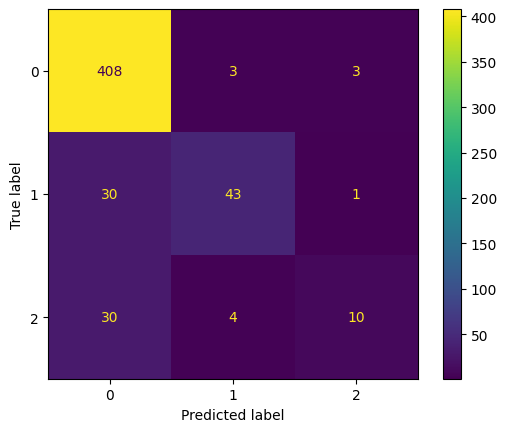

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_hat2)
ConfusionMatrixDisplay(cm).plot()

##  **3 FINAL CONSIDERATIONS** </font> <br>

Based on the results of the two approaches, it is evident that the model, after a phase of data cleaning and data transformation, performs better when using all the selected features. In the first approach (way 1), we achieved an F-score of 0.94, while in the second approach (way 2), the F-score was 0.89.

Furthermore, the confusion matrix reveals that in the second approach (way 2), the model struggles to distinguish between classes. Even though the first approach (way 1) also made mistakes, particularly in the classification of class 2. <br>
A potential solution could be to collect more data on cases with suspect and pathological health states. By doing so, we can create a larger and more balanced dataset to train the model. This would provide the model with a better representation of the minority classes and potentially improve its performance.